In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

### Data import

In [2]:
data = load_breast_cancer(as_frame=True)

### Data preparation

In [3]:
# (separate) X and y
X = data.data
y = data.target

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [5]:
# scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Testing of different ML models with cross-validation

In [6]:
# define models to test (for this comparison, default settings are used with every model)
seed = 101
log_model = LogisticRegression(random_state=seed)
SVC_model = SVC(random_state=seed)
KNN_model = KNeighborsClassifier()
GBC_model = GradientBoostingClassifier(random_state=seed)
DT_model = DecisionTreeClassifier(random_state=seed)
RF_model = RandomForestClassifier(random_state=seed)
NB_model = GaussianNB()

In [7]:
# models to use
models = [log_model, SVC_model, KNN_model, DT_model, RF_model, GBC_model, NB_model]

# metrics to use
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# empty dataframe for the evaluation scores
all_scores_df = pd.DataFrame()

# loop to do cross validation with all the models
for m in models:
    scores = cross_validate(m, X_train_sc, y_train, scoring=metrics, cv=5)
    scores_df = pd.DataFrame(scores)
    scores_df['model'] = str(m)
    all_scores_df = pd.concat([all_scores_df, scores_df], ignore_index=True)

# drop the time columns since those are unnecessary
all_scores_df = all_scores_df.drop(['fit_time', 'score_time'], axis=1)

# calculate the mean of the scores
mean_scores_df = all_scores_df.groupby('model').mean()

# calculate standard deviation for the scores and rename columns
std_scores_df = all_scores_df.groupby('model').std()
std_scores_df.rename(columns={'test_accuracy':'test_accuracy_std', 'test_precision':'test_precision_std', 
                              'test_recall':'test_recall_std', 'test_roc_auc':'test_roc_auc_std'}, inplace=True)

# join the two dataframes (mean scores and standard deviation)
final_scores_df = mean_scores_df.merge(std_scores_df, how='inner', left_on='model', right_on='model')

In [8]:
all_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,model
0,0.962500,0.944444,1.000000,0.994591,LogisticRegression(random_state=101)
1,0.962500,0.980000,0.960784,0.995943,LogisticRegression(random_state=101)
2,1.000000,1.000000,1.000000,1.000000,LogisticRegression(random_state=101)
3,0.962025,0.979592,0.960000,0.998621,LogisticRegression(random_state=101)
4,0.987342,0.980392,1.000000,0.998621,LogisticRegression(random_state=101)
5,0.962500,0.944444,1.000000,0.995267,SVC(random_state=101)
6,0.962500,0.980000,0.960784,0.994591,SVC(random_state=101)
7,0.987500,1.000000,0.980000,1.000000,SVC(random_state=101)
8,0.974684,1.000000,0.960000,0.999310,SVC(random_state=101)
9,0.987342,0.980392,1.000000,0.998621,SVC(random_state=101)


In [9]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.924842,0.941213,0.940863,0.919167,0.054332,0.044429,0.053629,0.057396
GaussianNB(),0.944778,0.950542,0.964392,0.988062,0.031348,0.034211,0.035562,0.010236
GradientBoostingClassifier(random_state=101),0.959905,0.965298,0.972314,0.991070,0.023950,0.027995,0.017629,0.008550
KNeighborsClassifier(),0.967405,0.962576,0.988157,0.986734,0.027409,0.036229,0.010812,0.011232
LogisticRegression(random_state=101),0.974873,0.976886,0.984157,0.997555,0.017735,0.020100,0.021696,0.002215
RandomForestClassifier(random_state=101),0.959905,0.968543,0.968392,0.988142,0.028425,0.022660,0.029752,0.012297
SVC(random_state=101),0.974905,0.980967,0.980157,0.997558,0.012461,0.022692,0.019806,0.002460


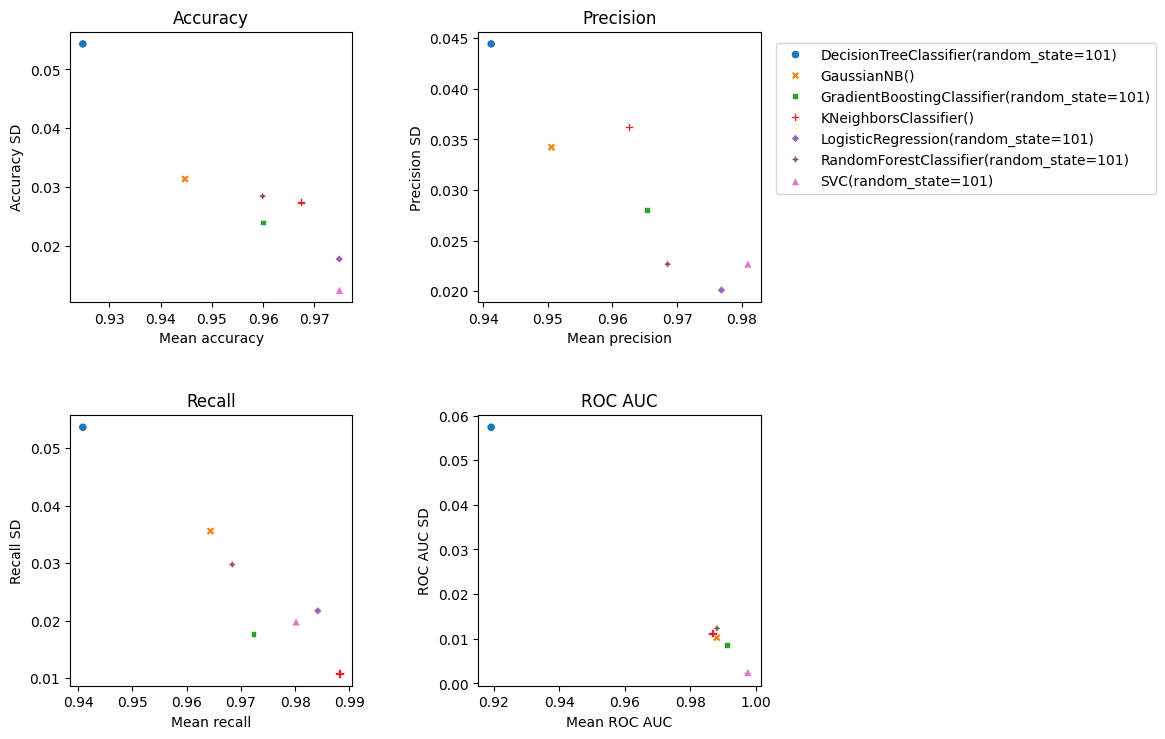

In [10]:
# plot the results to compare the performance of different classifiers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8.5))
fig.tight_layout(pad=6)

# accuracy
sns.scatterplot(data=final_scores_df, x='test_accuracy', y='test_accuracy_std', 
                hue='model', style='model', ax=ax[0][0])
ax[0][0].set_title('Accuracy')
ax[0][0].set_xlabel('Mean accuracy')
ax[0][0].set_ylabel('Accuracy SD')
ax[0][0].legend(loc=(2.5, 0.4))

sns.scatterplot(data=final_scores_df, x='test_precision', y='test_precision_std', 
                hue='model', style='model', ax=ax[0][1], legend=False)
ax[0][1].set_title('Precision')
ax[0][1].set_xlabel('Mean precision')
ax[0][1].set_ylabel('Precision SD')

sns.scatterplot(data=final_scores_df, x='test_recall', y='test_recall_std', 
                hue='model', style='model', ax=ax[1][0], legend=False)
ax[1][0].set_title('Recall')
ax[1][0].set_xlabel('Mean recall')
ax[1][0].set_ylabel('Recall SD')

sns.scatterplot(data=final_scores_df, x='test_roc_auc', y='test_roc_auc_std', 
                hue='model', style='model', ax=ax[1][1], legend=False)
ax[1][1].set_title('ROC AUC')
ax[1][1].set_xlabel('Mean ROC AUC')
ax[1][1].set_ylabel('ROC AUC SD');